# Boombikes - Shared bike analysis

In [1]:
#importing necessary librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1. Analysing the data in hand 

In [3]:
#checking NULL values in columns and its attributes type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Calculating the number of days
day_df['days'] =(pd.to_datetime(day_df['dteday'],format = "%d-%m-%Y") - pd.to_datetime('31-12-2017', format = "%d-%m-%Y")).dt.days
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


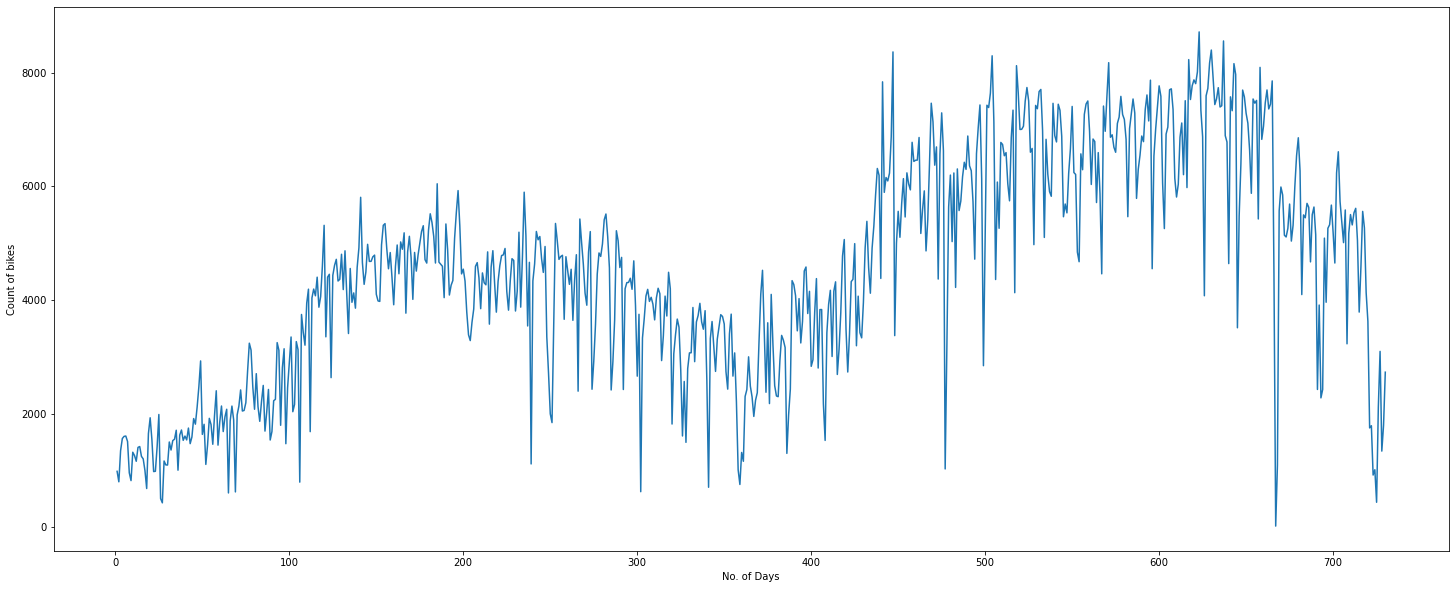

In [5]:
# analyzing days vs bike count
plt.figure(figsize = (25,10))
plt.plot(day_df['days'], day_df['cnt'])
plt.xlabel("No. of Days")
plt.ylabel("Count of bikes")
plt.show()

In [6]:
# removing unwanted columns
day_df.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


### 1.1 Analyzing the continous variables

In [7]:
# grouping the continous variables in a list
list_compare = ['temp','atemp','hum','windspeed','cnt']

<AxesSubplot:>

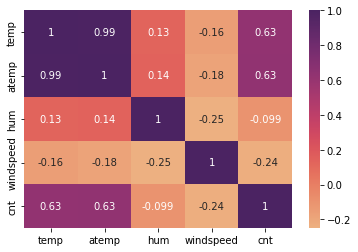

In [8]:
#checking the correlation coefficient of the list_compare
sns.heatmap(day_df[list_compare].corr(), annot= True, cmap = 'flare')

<Figure size 720x720 with 0 Axes>

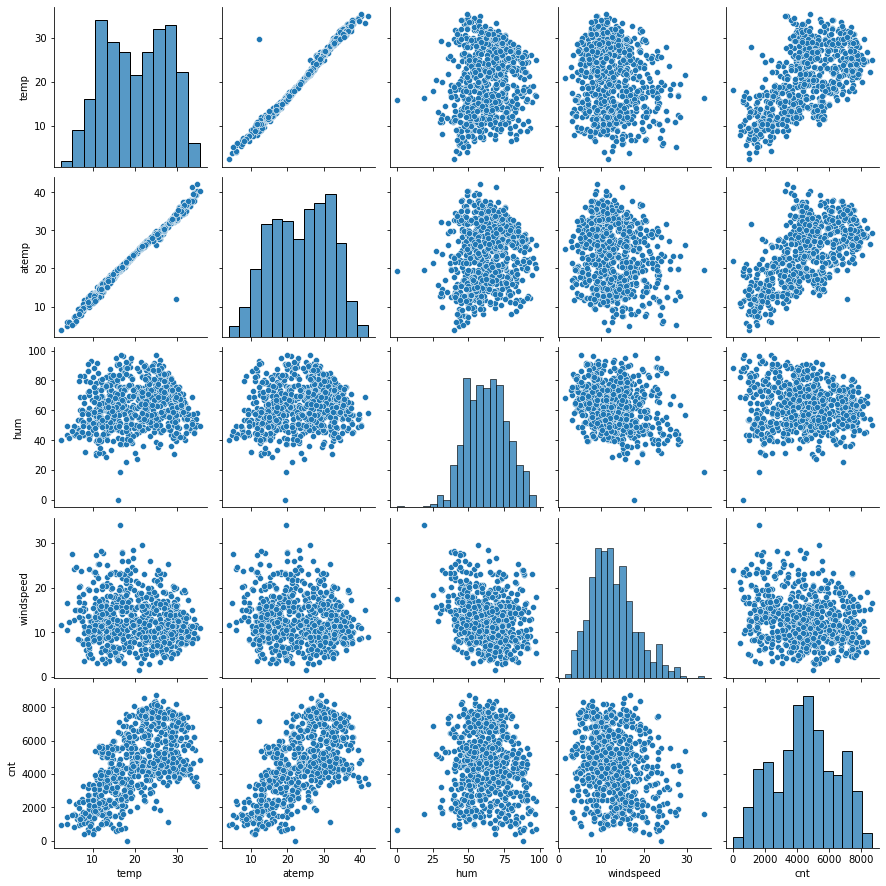

In [9]:
# checking the linear dependency amongst list_compare
plt.figure(figsize = (10,10))
sns.pairplot(day_df[list_compare])
plt.show()

### Analyzing the categorical variables

In [10]:
# converting numerical category to strings
day_df['season'].replace({1:"Spring", 2:"Summer",3:"Fall",4:"Winter"}, inplace = True)
day_df['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}, inplace = True)
day_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thurshday",5:"Friday",6:"Saturday"}, inplace = True)
day_df['weathersit'].replace({1:"Clear",2:"Cloudy",3:"Bad_Weather",4:"Very_Bad_Weather"}, inplace = True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

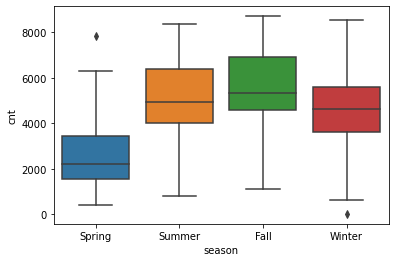

In [11]:
# impact of each categorical variable on the shared bike count
#1.impact of season 
sns.boxplot(day_df['season'],day_df['cnt'])

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

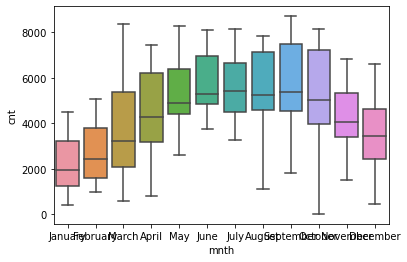

In [12]:
#2. Impact of month over count
sns.boxplot(day_df['mnth'], day_df['cnt'])

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

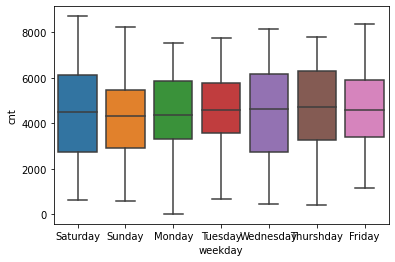

In [13]:
#impact of weekday on count
sns.boxplot(day_df['weekday'],day_df['cnt'])

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

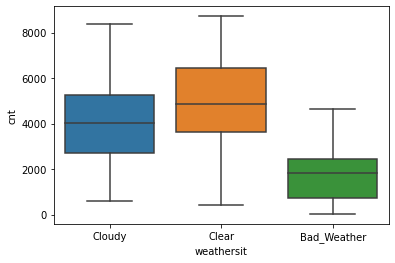

In [14]:
sns.boxplot(day_df['weathersit'], day_df['cnt'])

In [15]:
# handeling the dummy variables
day_df = pd.get_dummies(data = day_df, columns = ["season","mnth","weekday"], drop_first = True)
day_df = pd.get_dummies(data = day_df, columns = ["weathersit"])
day_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_Spring,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurshday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad_Weather,weathersit_Clear,weathersit_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,726,1,...,0,0,0,0,1,0,0,0,0,1
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,727,1,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,728,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,729,1,...,0,0,0,1,0,0,0,0,1,0


In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   days                    730 non-null    int64  
 9   season_Spring           730 non-null    uint8  
 10  season_Summer           730 non-null    uint8  
 11  season_Winter           730 non-null    uint8  
 12  mnth_August             730 non-null    uint8  
 13  mnth_December           730 non-null    uint8  
 14  mnth_February           730 non-null    ui

In [17]:
# applying min-max scaler to columns with continous variables
scaler = MinMaxScaler()
cont_var = ['temp','atemp', 'hum', 'windspeed', 'days','cnt']
day_df[cont_var] = scaler.fit_transform(day_df[cont_var])
day_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_Spring,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurshday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad_Weather,weathersit_Clear,weathersit_Cloudy
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,0.000000,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,0.001372,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0.002743,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0.004115,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0.005487,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,0.243025,0.193709,0.671380,0.675656,0.240681,0.994513,1,...,0,0,0,0,1,0,0,0,0,1
726,1,0,1,0.241986,0.230993,0.606684,0.274350,0.353543,0.995885,1,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0.241986,0.214393,0.774208,0.210260,0.151749,0.997257,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.497001,0.676936,0.204096,0.998628,1,...,0,0,0,1,0,0,0,0,1,0


## Model Building

In [18]:
y = day_df.pop('cnt')
X = day_df

In [19]:
# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [20]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thurshday,weekday_Tuesday,weekday_Wednesday,weathersit_Bad_Weather,weathersit_Clear,weathersit_Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.652773,0.341472,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143340,0.152778,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.543431,0.232053,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.658526,0.316663,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.755355,0.433334,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.997858,0.823075,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
X_train.shape

(511, 31)

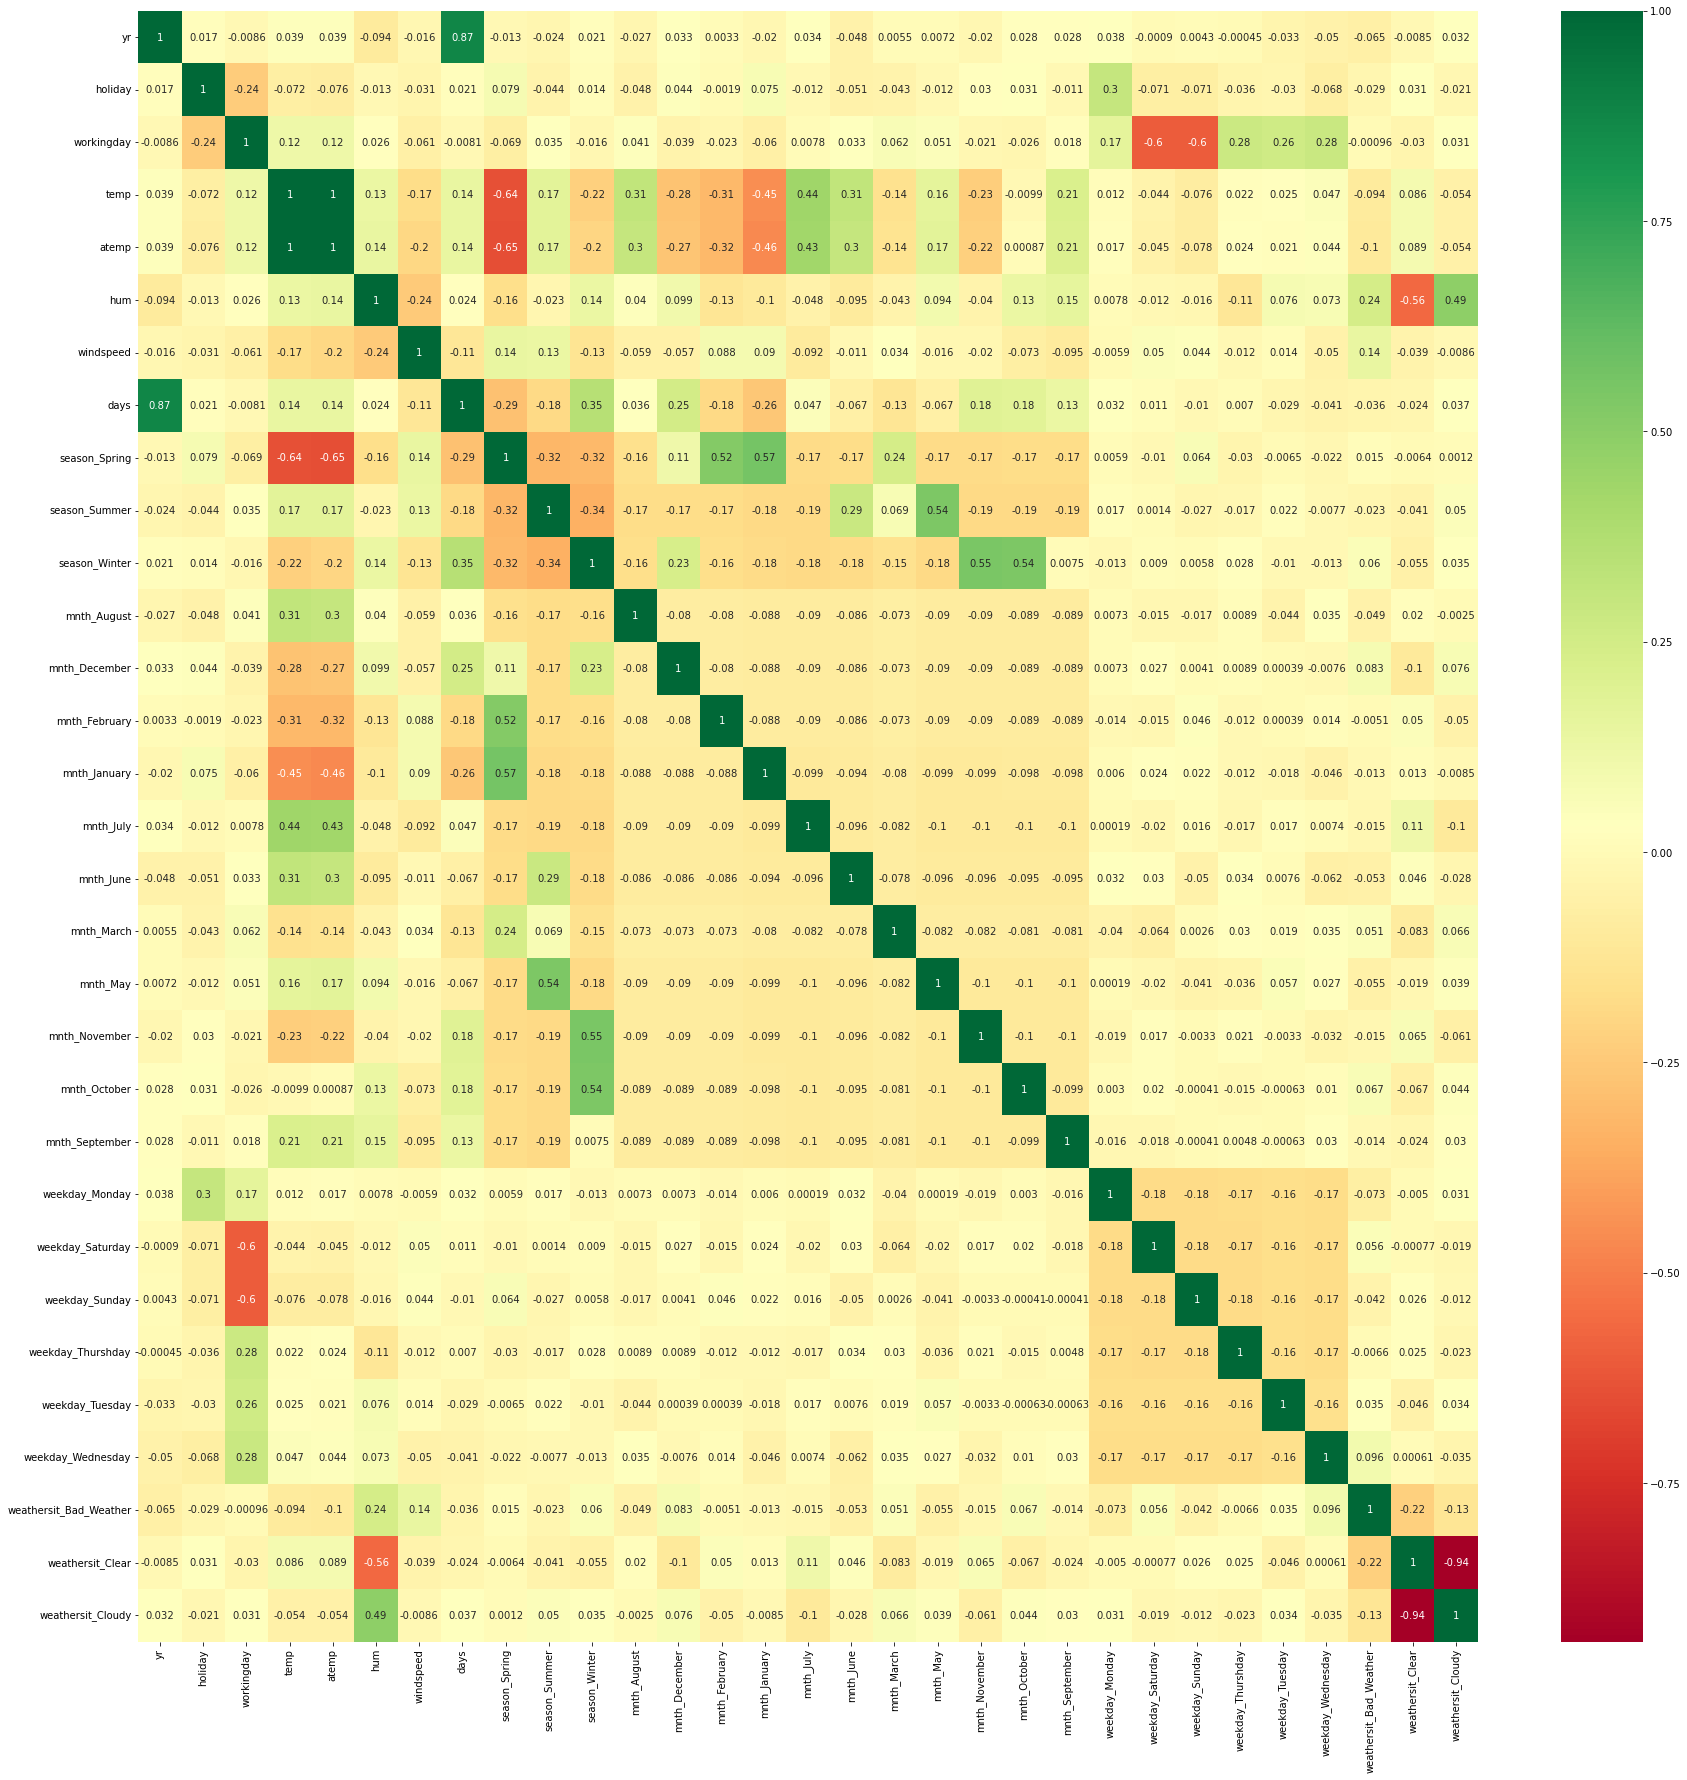

In [22]:
# correlation amongst the features
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(), cmap="RdYlGn", annot = True)
plt.show()

Since temp and atemp has high correlation we can wemove 'atemp' feature

In [23]:
X_train.drop(['atemp'], axis = 1, inplace =True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 683 to 102
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      511 non-null    int64  
 1   holiday                 511 non-null    int64  
 2   workingday              511 non-null    int64  
 3   temp                    511 non-null    float64
 4   hum                     511 non-null    float64
 5   windspeed               511 non-null    float64
 6   days                    511 non-null    float64
 7   season_Spring           511 non-null    uint8  
 8   season_Summer           511 non-null    uint8  
 9   season_Winter           511 non-null    uint8  
 10  mnth_August             511 non-null    uint8  
 11  mnth_December           511 non-null    uint8  
 12  mnth_February           511 non-null    uint8  
 13  mnth_January            511 non-null    uint8  
 14  mnth_July               511 non-null    

### Automated model building using RFE

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 16),
 ('season_Winter', False, 2),
 ('mnth_August', False, 7),
 ('mnth_December', False, 5),
 ('mnth_February', False, 9),
 ('mnth_January', False, 8),
 ('mnth_July', False, 14),
 ('mnth_June', False, 10),
 ('mnth_March', False, 3),
 ('mnth_May', False, 4),
 ('mnth_November', False, 6),
 ('mnth_October', True, 1),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 12),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thurshday', False, 15),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Bad_Weather', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', True, 1)]

List of features selected by RFE

In [28]:
RFE_featured = list(X_train.columns[rfe.support_])
RFE_featured

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'days',
 'season_Spring',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Bad_Weather',
 'weathersit_Clear',
 'weathersit_Cloudy']

VIF calculation before model building

In [29]:
df1 = X_train[RFE_featured]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
print(vif.sort_values(by = 'VIF', ascending = False))


                  Features   VIF
1                  holiday   inf
2               workingday   inf
10        weekday_Saturday   inf
11          weekday_Sunday   inf
12  weathersit_Bad_Weather   inf
13        weathersit_Clear   inf
14       weathersit_Cloudy   inf
6                     days  7.41
0                       yr  6.66
7            season_Spring  2.51
3                     temp  1.95
4                      hum  1.85
5                windspeed  1.20
8             mnth_October  1.17
9           mnth_September  1.14


C:\Users\haris\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### 1) Model building with all the features

In [30]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 24 May 2023   Prob (F-statistic):          2.38e-185
Time:                        21:04:58   Log-Likelihood:                 503.71
No. Observations:                 511   AIC:                            -979.4
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1982      0.025      7.957      0.000       0.149       0.247
yr                         0.2626      0.021     12.551      0.000       0.222       0.304
holiday                   -0.0070      0.021     -0.338      0.735      -0.048       0.034
workingday                 0.0817      0.009      8.735      0.000       0.063       0.100
temp                       0.3393      0.025     13.619      0.000       0.290       0.388
hum                       -0.1437      0.038     -3.735      0.000      -0.219      -0.068
windspeed                 -0.1512      0.029     -5.205      0.000      -0.208      -0.094
days                      -0.0725      0.038     -1.920      0.055      -0.147       0.002
season_Spring             -0.1803      0.015    -11.843      0.000      -0.210      -0.150
mnth_October               0.1013      0.015      6.627      0.000       0.071       0.131
mnth_September             0.0895      0.015      5.931      0.000       0.060       0.119
weekday_Saturday           0.0830      0.012      7.153      0.000       0.060       0.106
weekday_Sunday             0.0405      0.012      3.430      0.001       0.017       0.064
weathersit_Bad_Weather    -0.0648      0.022     -2.938      0.003      -0.108      -0.021
weathersit_Clear           0.1590      0.009     17.111      0.000       0.141       0.177
weathersit_Cloudy          0.1040      0.012      8.960      0.000       0.081       0.127
==============================================================================
Omnibus:                       81.985   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.204
Skew:                          -0.847   Prob(JB):                     2.23e-41
Kurtosis:                       5.433   Cond. No.                     2.28e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 1.1) VIF calculations

In [31]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))


                  Features   VIF
1                  holiday   inf
2               workingday   inf
10        weekday_Saturday   inf
11          weekday_Sunday   inf
12  weathersit_Bad_Weather   inf
13        weathersit_Clear   inf
14       weathersit_Cloudy   inf
6                     days  7.41
0                       yr  6.66
7            season_Spring  2.51
3                     temp  1.95
4                      hum  1.85
5                windspeed  1.20
8             mnth_October  1.17
9           mnth_September  1.14


C:\Users\haris\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


#### Removing 'Holiday' feature with high p-value

In [32]:
RFE_featured.remove('holiday')
RFE_featured

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'days',
 'season_Spring',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Bad_Weather',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 2) Model building after 'Holiday' feature removal

In [33]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 24 May 2023   Prob (F-statistic):          2.38e-185
Time:                        21:05:23   Log-Likelihood:                 503.71
No. Observations:                 511   AIC:                            -979.4
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1929      0.035      5.560      0.000       0.125       0.261
yr                         0.2626      0.021     12.551      0.000       0.222       0.304
workingday                 0.0887      0.025      3.523      0.000       0.039       0.138
temp                       0.3393      0.025     13.619      0.000       0.290       0.388
hum                       -0.1437      0.038     -3.735      0.000      -0.219      -0.068
windspeed                 -0.1512      0.029     -5.205      0.000      -0.208      -0.094
days                      -0.0725      0.038     -1.920      0.055      -0.147       0.002
season_Spring             -0.1803      0.015    -11.843      0.000      -0.210      -0.150
mnth_October               0.1013      0.015      6.627      0.000       0.071       0.131
mnth_September             0.0895      0.015      5.931      0.000       0.060       0.119
weekday_Saturday           0.0900      0.027      3.360      0.001       0.037       0.143
weekday_Sunday             0.0475      0.027      1.780      0.076      -0.005       0.100
weathersit_Bad_Weather    -0.0665      0.024     -2.766      0.006      -0.114      -0.019
weathersit_Clear           0.1572      0.011     13.853      0.000       0.135       0.180
weathersit_Cloudy          0.1022      0.014      7.339      0.000       0.075       0.130
==============================================================================
Omnibus:                       81.985   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.204
Skew:                          -0.847   Prob(JB):                     2.23e-41
Kurtosis:                       5.433   Cond. No.                     2.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2.1) VIF calculation

In [34]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

                  Features    VIF
12        weathersit_Clear  67.44
13       weathersit_Cloudy  44.68
1               workingday   8.56
5                     days   7.41
0                       yr   6.66
10          weekday_Sunday   5.62
9         weekday_Saturday   5.60
11  weathersit_Bad_Weather   5.43
6            season_Spring   2.51
2                     temp   1.95
3                      hum   1.85
4                windspeed   1.20
7             mnth_October   1.17
8           mnth_September   1.14


#### Removing 'Season_spring' which has very high coeff

In [35]:
RFE_featured.remove('season_Spring')
RFE_featured

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'days',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Bad_Weather',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 3) Model building after 'season_Spring' feature removal

In [36]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 24 May 2023   Prob (F-statistic):          9.15e-160
Time:                        21:05:31   Log-Likelihood:                 440.20
No. Observations:                 511   AIC:                            -854.4
Df Residuals:                     498   BIC:                            -799.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0289      0.036      0.803      0.422      -0.042       0.100
yr                         0.1411      0.021      6.841      0.000       0.101       0.182
workingday                 0.1088      0.028      3.829      0.000       0.053       0.165
temp                       0.5266      0.022     24.175      0.000       0.484       0.569
hum                       -0.1546      0.044     -3.552      0.000      -0.240      -0.069
windspeed                 -0.1339      0.033     -4.081      0.000      -0.198      -0.069
days                       0.1632      0.036      4.495      0.000       0.092       0.234
mnth_October               0.1121      0.017      6.499      0.000       0.078       0.146
mnth_September             0.0801      0.017      4.699      0.000       0.047       0.114
weekday_Saturday           0.1133      0.030      3.749      0.000       0.054       0.173
weekday_Sunday             0.0655      0.030      2.172      0.030       0.006       0.125
weathersit_Bad_Weather    -0.1178      0.027     -4.400      0.000      -0.170      -0.065
weathersit_Clear           0.0983      0.012      8.518      0.000       0.076       0.121
weathersit_Cloudy          0.0484      0.015      3.250      0.001       0.019       0.078
==============================================================================
Omnibus:                       48.252   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.649
Skew:                          -0.643   Prob(JB):                     3.74e-17
Kurtosis:                       4.378   Cond. No.                     2.45e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

                  Features    VIF
11        weathersit_Clear  53.96
12       weathersit_Cloudy  37.53
1               workingday   8.52
9           weekday_Sunday   5.60
8         weekday_Saturday   5.57
5                     days   5.35
0                       yr   5.06
10  weathersit_Bad_Weather   4.83
3                      hum   1.85
4                windspeed   1.19
2                     temp   1.16
6             mnth_October   1.16
7           mnth_September   1.13


#### Removing 'hum' which has very high coeff

In [38]:
RFE_featured.remove('hum')
RFE_featured

['yr',
 'workingday',
 'temp',
 'windspeed',
 'days',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Bad_Weather',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 4) Model building after 'hum' feature removal

In [39]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.7
Date:                Wed, 24 May 2023   Prob (F-statistic):          3.41e-158
Time:                        21:05:39   Log-Likelihood:                 433.81
No. Observations:                 511   AIC:                            -843.6
Df Residuals:                     499   BIC:                            -792.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0602      0.026     -2.309      0.021      -0.111      -0.009
yr                         0.1521      0.021      7.372      0.000       0.112       0.193
workingday                 0.1105      0.029      3.843      0.000       0.054       0.167
temp                       0.5146      0.022     23.640      0.000       0.472       0.557
windspeed                 -0.0995      0.032     -3.137      0.002      -0.162      -0.037
days                       0.1505      0.037      4.118      0.000       0.079       0.222
mnth_October               0.1079      0.017      6.198      0.000       0.074       0.142
mnth_September             0.0736      0.017      4.290      0.000       0.040       0.107
weekday_Saturday           0.1150      0.031      3.760      0.000       0.055       0.175
weekday_Sunday             0.0654      0.030      2.145      0.032       0.005       0.125
weathersit_Bad_Weather    -0.1689      0.023     -7.393      0.000      -0.214      -0.124
weathersit_Clear           0.0916      0.012      7.956      0.000       0.069       0.114
weathersit_Cloudy          0.0170      0.012      1.403      0.161      -0.007       0.041
==============================================================================
Omnibus:                       44.457   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.666
Skew:                          -0.602   Prob(JB):                     7.45e-16
Kurtosis:                       4.351   Cond. No.                     2.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

                  Features    VIF
10        weathersit_Clear  32.32
11       weathersit_Cloudy  18.53
1               workingday   8.52
8           weekday_Sunday   5.60
7         weekday_Saturday   5.57
4                     days   5.30
0                       yr   4.95
9   weathersit_Bad_Weather   2.65
5             mnth_October   1.16
2                     temp   1.14
6           mnth_September   1.12
3                windspeed   1.09


#### Removing 'weathersit_Bad_Weather' which has very high coeff

In [40]:
RFE_featured.remove('weathersit_Bad_Weather')
RFE_featured

['yr',
 'workingday',
 'temp',
 'windspeed',
 'days',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 5) Model building after 'weathersit_Bad_Weather' feature removal

In [41]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     164.7
Date:                Wed, 24 May 2023   Prob (F-statistic):          3.41e-158
Time:                        21:06:52   Log-Likelihood:                 433.81
No. Observations:                 511   AIC:                            -843.6
Df Residuals:                     499   BIC:                            -792.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2291      0.044     -5.198      0.000      -0.316      -0.143
yr                    0.1521      0.021      7.372      0.000       0.112       0.193
workingday            0.1105      0.029      3.843      0.000       0.054       0.167
temp                  0.5146      0.022     23.640      0.000       0.472       0.557
windspeed            -0.0995      0.032     -3.137      0.002      -0.162      -0.037
days                  0.1505      0.037      4.118      0.000       0.079       0.222
mnth_October          0.1079      0.017      6.198      0.000       0.074       0.142
mnth_September        0.0736      0.017      4.290      0.000       0.040       0.107
weekday_Saturday      0.1150      0.031      3.760      0.000       0.055       0.175
weekday_Sunday        0.0654      0.030      2.145      0.032       0.005       0.125
weathersit_Clear      0.2605      0.028      9.194      0.000       0.205       0.316
weathersit_Cloudy     0.1859      0.029      6.477      0.000       0.130       0.242
==============================================================================
Omnibus:                       44.457   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.666
Skew:                          -0.602   Prob(JB):                     7.45e-16
Kurtosis:                       4.351   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))


             Features    VIF
4                days  20.49
1          workingday  15.77
9    weathersit_Clear  13.35
0                  yr  10.01
10  weathersit_Cloudy   7.86
2                temp   7.66
3           windspeed   5.64
8      weekday_Sunday   4.41
7    weekday_Saturday   4.27
5        mnth_October   1.27
6      mnth_September   1.23


#### Removing 'windspeed' which has very high coeff

In [43]:
RFE_featured.remove('windspeed')
RFE_featured

['yr',
 'workingday',
 'temp',
 'days',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 6) Model building after 'windspeed' feature removal

In [44]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 24 May 2023   Prob (F-statistic):          3.19e-157
Time:                        21:08:00   Log-Likelihood:                 428.82
No. Observations:                 511   AIC:                            -835.6
Df Residuals:                     500   BIC:                            -789.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2807      0.041     -6.806      0.000      -0.362      -0.200
yr                    0.1430      0.021      6.939      0.000       0.103       0.183
workingday            0.1081      0.029      3.729      0.000       0.051       0.165
temp                  0.5220      0.022     23.907      0.000       0.479       0.565
days                  0.1684      0.036      4.627      0.000       0.097       0.240
mnth_October          0.1098      0.018      6.251      0.000       0.075       0.144
mnth_September        0.0755      0.017      4.365      0.000       0.041       0.109
weekday_Saturday      0.1105      0.031      3.587      0.000       0.050       0.171
weekday_Sunday        0.0612      0.031      1.992      0.047       0.001       0.122
weathersit_Clear      0.2727      0.028      9.630      0.000       0.217       0.328
weathersit_Cloudy     0.1978      0.029      6.890      0.000       0.141       0.254
==============================================================================
Omnibus:                       45.930   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.846
Skew:                          -0.608   Prob(JB):                     9.22e-17
Kurtosis:                       4.410   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

            Features    VIF
3               days  20.36
1         workingday  13.77
8   weathersit_Clear  13.04
0                 yr   9.94
9  weathersit_Cloudy   7.68
2               temp   7.63
7     weekday_Sunday   3.90
6   weekday_Saturday   3.73
4       mnth_October   1.27
5     mnth_September   1.23


#### Removing 'days' as it has very high VIF factor 

In [46]:
RFE_featured.remove('days')
RFE_featured

['yr',
 'workingday',
 'temp',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Clear',
 'weathersit_Cloudy']

### 7) Model building after 'hum' feature removal

In [47]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 24 May 2023   Prob (F-statistic):          7.69e-154
Time:                        21:08:12   Log-Likelihood:                 418.10
No. Observations:                 511   AIC:                            -816.2
Df Residuals:                     501   BIC:                            -773.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2453      0.041     -5.933      0.000      -0.327      -0.164
yr                    0.2278      0.010     23.769      0.000       0.209       0.247
workingday            0.1050      0.030      3.551      0.000       0.047       0.163
temp                  0.5411      0.022     24.741      0.000       0.498       0.584
mnth_October          0.1375      0.017      8.163      0.000       0.104       0.171
mnth_September        0.0937      0.017      5.458      0.000       0.060       0.127
weekday_Saturday      0.1093      0.031      3.479      0.001       0.048       0.171
weekday_Sunday        0.0577      0.031      1.841      0.066      -0.004       0.119
weathersit_Clear      0.2671      0.029      9.255      0.000       0.210       0.324
weathersit_Cloudy     0.1929      0.029      6.593      0.000       0.135       0.250
==============================================================================
Omnibus:                       22.621   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.839
Skew:                          -0.441   Prob(JB):                     1.49e-06
Kurtosis:                       3.694   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

            Features    VIF
1         workingday  13.49
7   weathersit_Clear  12.89
8  weathersit_Cloudy   7.59
2               temp   7.27
6     weekday_Sunday   3.84
5   weekday_Saturday   3.64
0                 yr   2.09
4     mnth_September   1.17
3       mnth_October   1.11


#### Removing 'weathersit_Clear' as it has very high VIF factor 

In [49]:
RFE_featured.remove('weathersit_Clear')
RFE_featured

['yr',
 'workingday',
 'temp',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Cloudy']

### 8) Model building after 'weathersit_Clear' feature removal

In [50]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 24 May 2023   Prob (F-statistic):          7.05e-138
Time:                        21:08:15   Log-Likelihood:                 377.78
No. Observations:                 511   AIC:                            -737.6
Df Residuals:                     502   BIC:                            -699.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0073      0.034      0.218      0.828      -0.059       0.073
yr                    0.2331      0.010     22.537      0.000       0.213       0.253
workingday            0.0935      0.032      2.927      0.004       0.031       0.156
temp                  0.5626      0.024     23.929      0.000       0.516       0.609
mnth_October          0.1255      0.018      6.913      0.000       0.090       0.161
mnth_September        0.0902      0.019      4.862      0.000       0.054       0.127
weekday_Saturday      0.0932      0.034      2.748      0.006       0.027       0.160
weekday_Sunday        0.0521      0.034      1.539      0.125      -0.014       0.119
weathersit_Cloudy    -0.0613      0.011     -5.632      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       41.901   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.261
Skew:                          -0.665   Prob(JB):                     2.72e-12
Kurtosis:                       3.855   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

            Features   VIF
2               temp  6.68
1         workingday  5.71
0                 yr  2.04
5   weekday_Saturday  1.93
6     weekday_Sunday  1.90
7  weathersit_Cloudy  1.53
4     mnth_September  1.17
3       mnth_October  1.11


#### Removing 'weekday_Sunday' as it has very highp val

In [52]:
RFE_featured.remove('weekday_Sunday')
RFE_featured

['yr',
 'workingday',
 'temp',
 'mnth_October',
 'mnth_September',
 'weekday_Saturday',
 'weathersit_Cloudy']

### 8) Model building after 'weekday_Sunday' feature removal

In [53]:
X_train_sm = sm.add_constant(X_train[RFE_featured])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 24 May 2023   Prob (F-statistic):          1.58e-138
Time:                        21:08:19   Log-Likelihood:                 376.57
No. Observations:                 511   AIC:                            -737.1
Df Residuals:                     503   BIC:                            -703.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0509      0.018      2.822      0.005       0.015       0.086
yr                    0.2329      0.010     22.485      0.000       0.213       0.253
workingday            0.0491      0.014      3.558      0.000       0.022       0.076
temp                  0.5640      0.024     23.975      0.000       0.518       0.610
mnth_October          0.1247      0.018      6.863      0.000       0.089       0.160
mnth_September        0.0902      0.019      4.853      0.000       0.054       0.127
weekday_Saturday      0.0490      0.018      2.715      0.007       0.014       0.084
weathersit_Cloudy    -0.0610      0.011     -5.595      0.000      -0.082      -0.040
==============================================================================
Omnibus:                       41.349   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.722
Skew:                          -0.668   Prob(JB):                     5.87e-12
Kurtosis:                       3.801   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df1 = X_train[RFE_featured]
VIF = pd.DataFrame()
VIF['Features'] = df1.columns
VIF['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
print(VIF.sort_values(by = 'VIF', ascending = False))

            Features   VIF
2               temp  4.39
1         workingday  3.49
0                 yr  1.94
5   weekday_Saturday  1.49
6  weathersit_Cloudy  1.47
4     mnth_September  1.16
3       mnth_October  1.11


### Final build using sklearn

In [55]:
lr.fit(X_train[RFE_featured], y_train)
print(lr.intercept_, lr.coef_)

0.05090086668420535 [ 0.23287517  0.04913774  0.56397472  0.12467503  0.09018392  0.0489847
 -0.06101346]


In [56]:
y_train_predict = lr.predict(X_train[RFE_featured])

In [57]:
# plot histogram of error terms

In [58]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title("Error terms")
    plt.xlabel("Density")

C:\Users\haris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


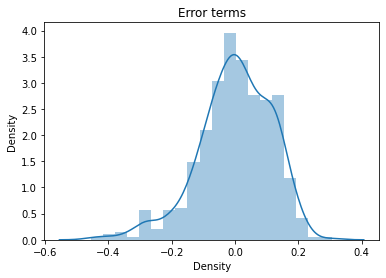

In [59]:
plot_res_dist(y_train, y_train_predict)

In [60]:
r2_score(y_train, y_train_predict)

0.7298421940227604

Applying the scaling on the test sets

In [61]:
y_test_predict = lr.predict(X_test[RFE_featured])

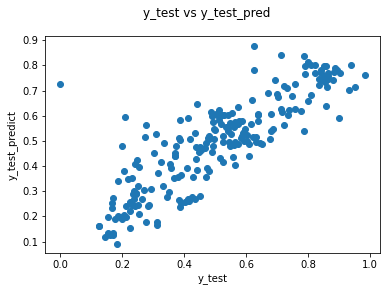

In [62]:
# plotting y_test and y_predicted
plt.figure()
plt.scatter(y_test, y_test_predict)
plt.suptitle("y_test vs y_test_pred")
plt.xlabel("y_test")
plt.ylabel("y_test_predict")
plt.show()

In [63]:
r2_score(y_test, y_test_predict)

0.7143186378065083